In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.Chebyschev_coefs as ch
import pylib.qucf_read as qucf_r
import pylib.measurement as mse
import cvxpy as cp

24984
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
path_qucf_ = "../QuCF/simulations/Rigetti/BE"
for _ in range(100):
    plt.close()

In [7]:
mix.reload_module(mix)
def plot_save_diagonals(A_plot, A_name, flag_save = False, path_save = ""):
    def save_data(rows_loc, diag_loc, sh_loc):
        full_name = path_save + "//" + A_name + "_diag_{:d}".format(sh_loc)
        yx_loc = diag_loc.real
        mix.save_dat_plot_1d_file(full_name, rows_loc, yx_loc)
        return
    # ----------------------------------------

    sh_1 = 0
    diag_1, rows_1 = mix.get_diag(A_plot, i_shift = sh_1)

    sh_2 = 1
    diag_2, rows_2 = mix.get_diag(A_plot, i_shift = sh_2)

    sh_3 = -1
    diag_3, rows_3 = mix.get_diag(A_plot, i_shift = sh_3)

    # --- Real parts ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(rows_1, diag_1.real, color='b', marker = "o", linewidth = 2, linestyle='-', label = "shift = {:d}".format(sh_1))
    ax.plot(rows_2, diag_2.real, color='r', marker = "o", linewidth = 2, linestyle='--', label = "shift = {:d}".format(sh_2))
    ax.plot(rows_3, diag_3.real, color='g', marker = "o", linewidth = 2, linestyle='--', label = "shift = {:d}".format(sh_3))
    plt.xlabel('row')
    plt.ylabel("Re")
    plt.title("Real parts of {:s}".format(A_name))
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Saving ---
    if flag_save:
        save_data(rows_1, diag_1, sh_1)
        save_data(rows_2, diag_2, sh_2)
        save_data(rows_3, diag_3, sh_3)
    return

--- Chosen parameters ---
nx, Nx: 4, 16
s, r: 1.0, 1.0
---

the matrix A is Hermitian
Matrix A:	 nonsparsity, coefnorm: 3, 6.317e+02


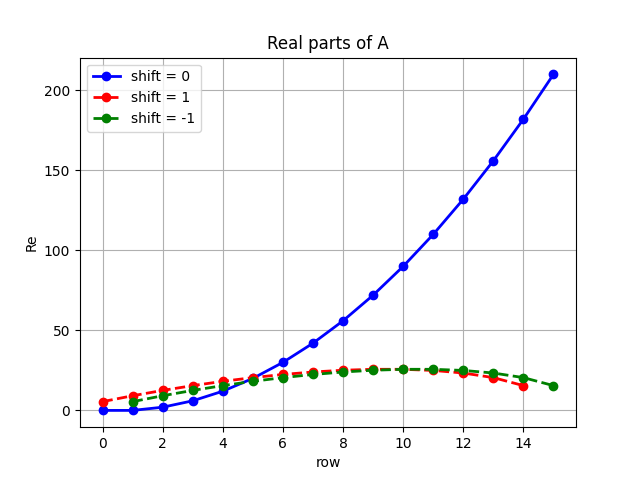

In [8]:
# -------------------------------------------------------------------------------
# --- Initial parameters ---
# -------------------------------------------------------------------------------
mix.reload_module(mix)

t_ = 1.0
nx_ = 4

# --- Matrix parameters ---
Nx_ = 1<<nx_
s_ = 1.0
r_ = 1.0
print("--- Chosen parameters ---")
print("nx, Nx: {:d}, {:d}".format(nx_, Nx_))
print("s, r: {:0.1f}, {:0.1f}".format(s_, r_))
print("---\n")

# --- The target matrix ---
A = np.zeros((Nx_, Nx_), dtype=complex)
for ii in range(Nx_):
    A[ii,ii] = r_ * ii * (ii - 1)
    if ii > 0:
        k = ii
        v = (Nx_ - k) * k * (s_ + k)
        A[ii,ii-1] = np.sqrt(v)
    if ii < (Nx_-1):
        k = ii + 1
        v = (Nx_ - k) * k * (s_ + k)
        A[ii,ii+1] = np.sqrt(v)
mix.is_Hermitian(A, "A")

# --- Normalization ---
A_norm, norm_a, nonsparsity_a = mix.compute_normalized_matrix(A, "A", True)

# --- Plotting ---
plot_save_diagonals(A, "A", flag_save = False)

In [10]:
def build_func_ampl(x, coefs, Ncoefs):
    for ii in range(0,Ncoefs):
        res_pol += coefs[ii] * np.sin(x)
    return res_pol 



Ncoefs = 10
x = np.linspace(-1.0, 1.0, Nx_)
y = r_ * x * (x-1)
y = [r_ * k * (k - 1) for k in range(-Nx_+1, Nx_)]

len(y)


# coefs = cp.Variable(Ncoefs)
# objective = cp.Minimize(cp.sum_squares(build_func_ampl(x, coefs, Ncoefs) - ch_maxs))

31